In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

C:\Users\jasmo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\jasmo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
df = pd.read_stata('ITD214_data_4.dta')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586 entries, 0 to 1585
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     1586 non-null   int32  
 1   lqual    1586 non-null   int32  
 2   lsource  1586 non-null   int32  
 3   country  1586 non-null   int32  
 4   spec     1586 non-null   int32  
 5   occup    1586 non-null   int32  
 6   time     1586 non-null   float32
 7   visit    1586 non-null   float32
 8   page     1586 non-null   float32
 9   ascore   1586 non-null   float32
 10  pscore   1586 non-null   float32
dtypes: float32(5), int32(6)
memory usage: 80.5 KB


Here I have already removed all the rows with missing values

In [5]:
df.describe()

,city,lqual,lsource,country,spec,occup,time,visit,page,ascore,pscore
count,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000,1586.000000
mean,0.592055,0.147541,2.506305,0.951450,2.248424,0.143758,740.978577,4.886507,3.269899,14.149432,17.430012
std,0.491608,0.354756,0.569707,0.214993,0.960455,0.350955,562.171692,3.742295,1.816777,1.259806,1.758033
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.000000,12.000000
25%,0.000000,0.000000,2.000000,1.000000,2.000000,0.000000,228.000000,3.000000,2.000000,14.000000,16.000000
50%,1.000000,0.000000,3.000000,1.000000,2.000000,0.000000,685.500000,4.000000,3.000000,14.000000,18.000000
75%,1.000000,0.000000,3.000000,1.000000,3.000000,0.000000,1224.000000,6.000000,4.000000,15.000000,18.000000
max,1.000000,1.000000,3.000000,1.000000,4.000000,1.000000,2253.000000,43.000000,15.000000,18.000000,20.000000


In [6]:
df.head()

,city,lqual,lsource,country,spec,occup,time,visit,page,ascore,pscore
0,1,0,2,1,2,0,1532.0,2.0,2.0,14.0,20.0
1,1,0,2,1,3,0,305.0,1.0,1.0,13.0,17.0
2,1,0,3,1,2,0,1640.0,2.0,2.0,14.0,20.0
3,0,0,3,1,2,0,1351.0,8.0,8.0,15.0,14.0
4,1,0,3,1,3,0,233.0,1.0,1.0,13.0,17.0


In [7]:
x = df.drop('time', axis = 1) 
y = df['time']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 2049767) 

ranfor = RandomForestRegressor(n_estimators = 500, random_state = 2049767)  
ranfor.fit(x_train, y_train)

y_prediction = ranfor.predict(x_test)

mse = mean_squared_error(y_test, y_prediction)
print("The mean squared error for random forest is", mse)

The mean squared error for random forest is 306373.88491921365


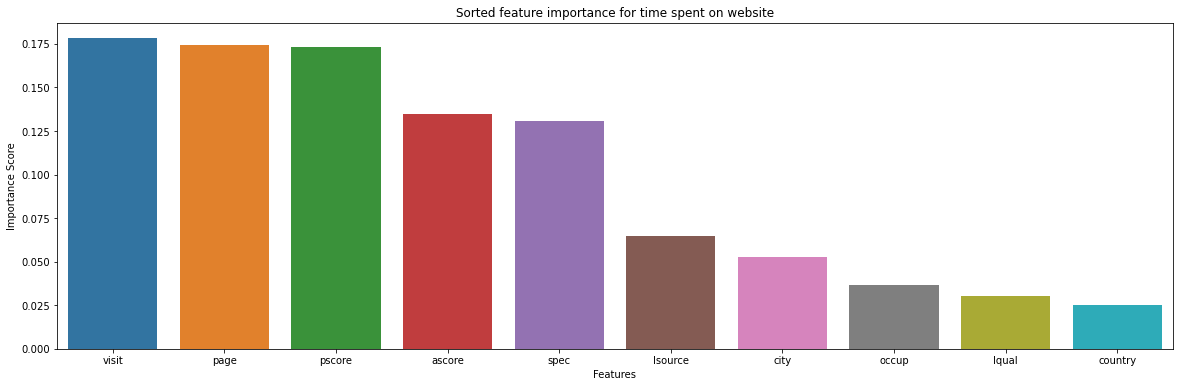

In [12]:
importance = ranfor.feature_importances_

feature_importance = pd.Series(importance, index = x.columns)

feature_importance_sorted = feature_importance.sort_values(ascending = False)

plt.figure(figsize = (20, 6))
sns.barplot(y = feature_importance_sorted, x = feature_importance_sorted.index)
plt.title("Sorted feature importance for time spent on website")
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

Reference: <br>
visit = Number of visits to the website <br>
page = Number of page views <br>
pscore = Profile score <br>
ascore = Activity score <br>
spec = Specialization (Such as Finance, Business) <br>
lsource = Lead Source (Referral, Direct Traffic, Search Engine) <br>
city = Mumbai or not Mumbai <br>
occup = Occuptaion (Working or not working) <br>
lqual = Lead quality (High relevance or not) <br>
country = India or not India

In [9]:
x2 = df.drop('time', axis=1)
y2 = df['time']

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.25, random_state=2049767)

linreg = LinearRegression()
linreg.fit(x_train2, y_train2)

y_prediction2 = linreg.predict(x_test2)

mse = mean_squared_error(y_test2, y_prediction2)
print("The mean squared error for linear regression is", mse)
print("The coefficients are" , linreg.coef_)
print("The intercept is", linreg.intercept_)

The mean squared error for linear regression is 271659.78775114554
The coefficients are [ 13.4425368  214.56382098  54.17758601   1.23154191   7.93427207
 251.94989929  -0.85102668  -1.13279808  62.85905824  16.06499741]
The intercept is -643.1197477351507


In [10]:
x_train2_sm = sm.add_constant(x_train2)

linregmodel = sm.OLS(y_train2, x_train2_sm).fit()

linregmodel.summary()

C:\Users\jasmo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     9.706
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           1.04e-15
Time:                        18:55:43   Log-Likelihood:                -9176.4
No. Observations:                1189   AIC:                         1.837e+04
Df Residuals:                    1178   BIC:                         1.843e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -643.1197    274.876     -2.340      0.019   -1182.421    -103.818
city          13.4425     37.107      0.362      0.717     -59.360      86.245
lqual        214.5638     46.194      4.645      0.000     123.931     305.196
lsource       54.1776     28.728      1.886      0.060      -2.187     110.542
country        1.2315     74.212      0.017      0.987    -144.372     146.835
spec           7.9343     16.969      0.468      0.640     -25.358      41.226
occup        251.9499     45.694      5.514      0.000     162.298     341.602
visit         -0.8510      4.488     -0.190      0.850      -9.656       7.954
page          -1.1328      9.581     -0.118      0.906     -19.931      17.665
ascore        62.8591     13.181      4.769      0.000      36.999      88.720
pscore        16.0650     10.453      1.537      0.125      -4.443      36.573
==============================================================================
Omnibus:                      145.185   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.677
Skew:                           0.444   Prob(JB):                     1.65e-16
Kurtosis:                       2.176   Cond. No.                         411.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Evaluating the Random Forest (MSE = 306,374) and Linear Regression (MSE = 271,660) model, as Linear regression has the lower mean squared error, it is chosen as the better model <br>
The significant independent variables with p-value < 0.05 are lead quality, occupation, and activity score. <br>
For lead quality, every one unit increase in lead quality (in this case, as it is a binary variable, 0 = low or not relevant, 1 = highly relevant), it will lead to an increase in 215 minutes of time spent on the website <br>
For occupation, every one unit increase in occupation (in this case, it is also a binary variable, 0 = not working, 1 = working), so working people are more likely to spend more time on the website compared to non-working people by about 252 minutes. <br>
Lastly, one unit increase in activity score (continuous variable) will lead to an increase in 63 minutes of time spent on the website. <br>